In [86]:
# Shoreline data from https://www.ngdc.noaa.gov/mgg/shorelines/
import os
import pandas
import geopandas
from matplotlib import pyplot as plt
from shapely.geometry import Point
datadir = '/home/idies/workspace/Temporary/raddick/coastline_scratch/GSHHS_shp/'
print('ok')

ok


Point 595: coastlength = 14.2 deg, crowlength = 2.4 deg, diff = 11.8 deg (4.8x)


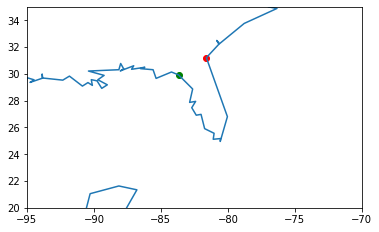

In [142]:
ocean_coasts_crude_gdf = geopandas.read_file(datadir+'c/'+'GSHHS_c_L1.shp')
north_america_gdf = ocean_coasts_crude_gdf.sort_values(by='area',ascending=False)[3:4]
#ocean_coasts_crude_gdf
fig,ax=plt.subplots()
north_america_gdf.boundary.plot(ax=ax)
coastlength = 0
orig_point = Point(ocean_coasts_crude_gdf.sort_values(by='area',ascending=False)[3:4].boundary.values[0].coords[582])
geopandas.GeoDataFrame([orig_point], columns=['geometry']).plot(ax=ax, color='red')
for i in range(583, 596):
    this_point = Point(ocean_coasts_crude_gdf.sort_values(by='area',ascending=False)[3:4].boundary.values[0].coords[i])
    prev_point = Point(ocean_coasts_crude_gdf.sort_values(by='area',ascending=False)[3:4].boundary.values[0].coords[i-1])
    coastlength = coastlength + this_point.distance(prev_point)
    crowlength = this_point.distance(orig_point)    
    if ((coastlength-crowlength)/crowlength > 4):
        print('Point {0:.0f}: coastlength = {1:,.1f} deg, crowlength = {2:,.1f} deg, diff = {3:,.1f} deg ({4:,.1f}x)'.format(i, coastlength, crowlength, coastlength - crowlength, (coastlength-crowlength)/crowlength))
        geopandas.GeoDataFrame([Point(ocean_coasts_crude_gdf.sort_values(by='area',ascending=False)[3:4].boundary.values[0].coords[i])], columns=['geometry']).plot(ax=ax, color='green')
plt.xlim([-95,-70])
plt.ylim([20,35])
plt.show()
# Florida: 


AttributeError: 'PatchCollection' object has no property 'linecolor'

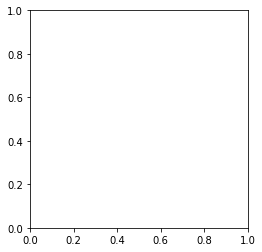

In [32]:
fig, ax = plt.subplots(1,1)
gdf.plot(ax=ax, color='none')
for ix, thisrow in gdf.iterrows():
    annotator = '{0:,.0f}'.format(ix)
    positor = (thisrow.geometry.centroid.x, thisrow.geometry.centroid.y)
    ax.annotate(annotator,positor)
plt.xlim([-130,-60])
plt.ylim([20,50])
plt.show()

In [26]:
gdf.sample(1).T

,263
id,1026
level,2
source,WDBII
parent_id,2
sibling_id,180777
area,552.042
geometry,"POLYGON ((-98.205 64.13888900000001, -98.15055..."
